In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


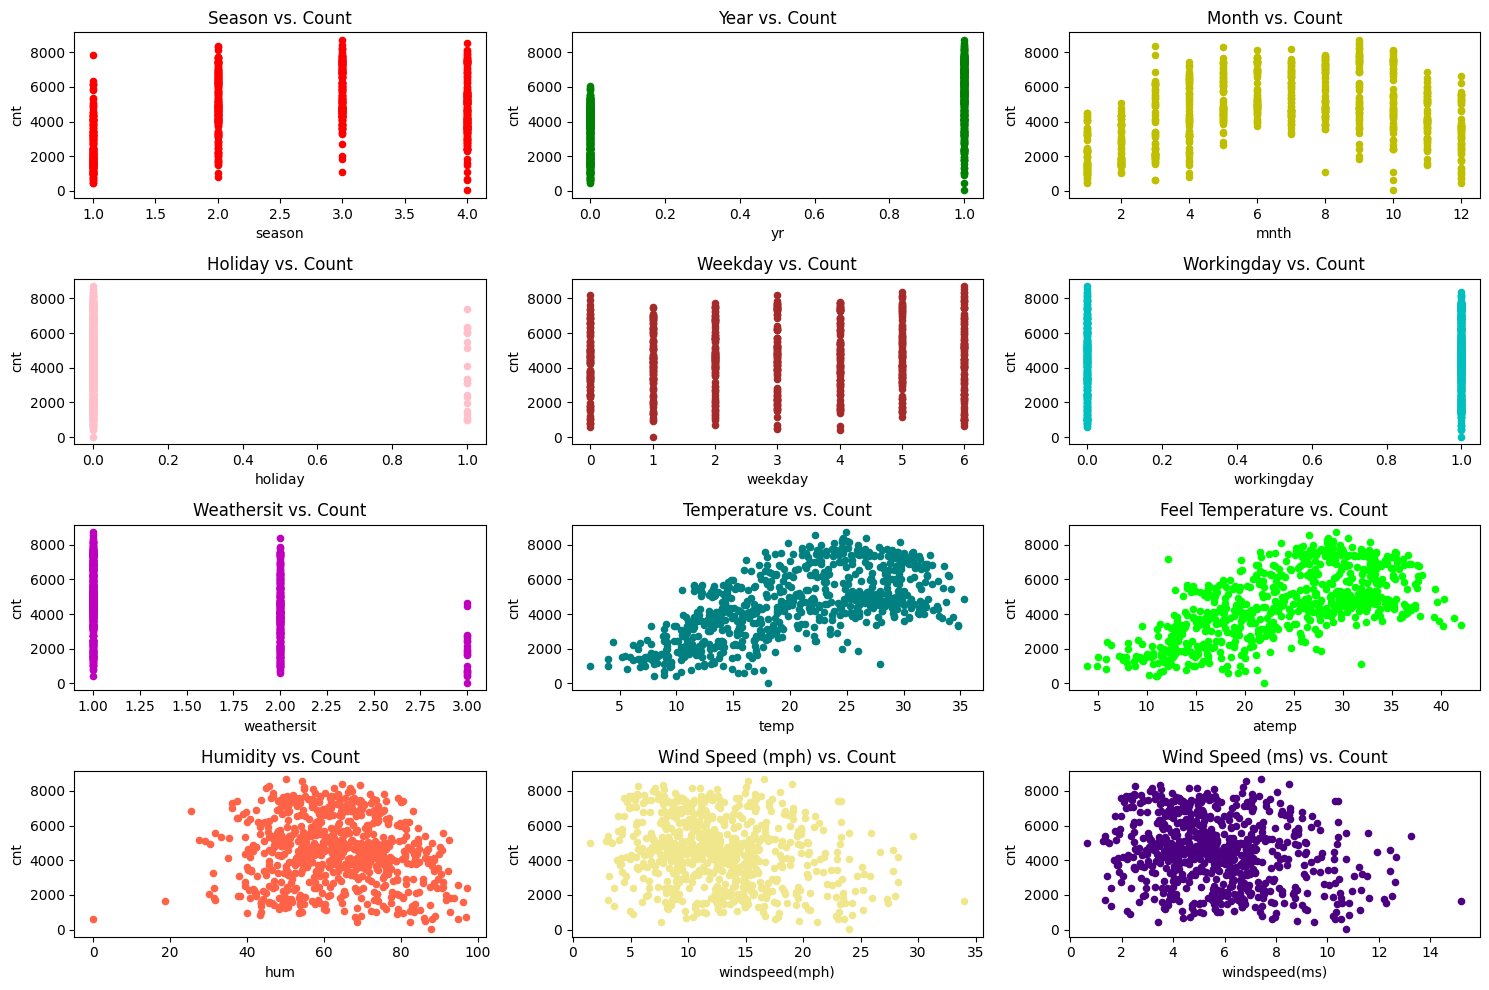

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
df.plot(kind='scatter', x='season', y='cnt', color='r', ax=axes[0, 0])
df.plot(kind='scatter', x='yr', y='cnt', color='g', ax=axes[0, 1])
df.plot(kind='scatter', x='mnth', y='cnt', color='y', ax=axes[0, 2])
df.plot(kind='scatter', x='holiday', y='cnt', color='pink', ax=axes[1, 0])
df.plot(kind='scatter', x='weekday', y='cnt', color='brown', ax=axes[1, 1])
df.plot(kind='scatter', x='workingday', y='cnt', color='c', ax=axes[1, 2])
df.plot(kind='scatter', x='weathersit', y='cnt', color='m', ax=axes[2, 0])
df.plot(kind='scatter', x='temp', y='cnt', color='teal', ax=axes[2, 1])
df.plot(kind='scatter', x='atemp', y='cnt', color='lime', ax=axes[2, 2])
df.plot(kind='scatter', x='hum', y='cnt', color='tomato', ax=axes[3, 0])
df.plot(kind='scatter', x='windspeed(mph)', color='khaki', y='cnt', ax=axes[3, 1])
df.plot(kind='scatter', x='windspeed(ms)', y='cnt', color='indigo', ax=axes[3, 2])
axes[0, 0].set_title('Season vs. Count')
axes[0, 1].set_title('Year vs. Count')
axes[0, 2].set_title('Month vs. Count')
axes[1, 0].set_title('Holiday vs. Count')
axes[1, 1].set_title('Weekday vs. Count')
axes[1, 2].set_title('Workingday vs. Count')
axes[2, 0].set_title('Weathersit vs. Count')
axes[2, 1].set_title('Temperature vs. Count')
axes[2, 2].set_title('Feel Temperature vs. Count')
axes[3, 0].set_title('Humidity vs. Count')
axes[3, 1].set_title('Wind Speed (mph) vs. Count')
axes[3, 2].set_title('Wind Speed (ms) vs. Count')
plt.tight_layout()
plt.show()